# Jupyter - Day 8 - Section 002
# Lecture 8: The Last of the Linear Regression

In the last few lectures, we have focused on linear regression, that is, fitting models of the form 

$$
Y =  \beta_0 +  \beta_1 X_1 +  \beta_2 X_2 + \cdots +  \beta_pX_p + \varepsilon
$$

In this lab, we will continue to use two different tools for linear regression. 
- [Scikit learn](https://scikit-learn.org/stable/index.html) is arguably the most used tool for machine learning in python 
- [Statsmodels](https://www.statsmodels.org) provides many of the statisitcial tests we've been learning in class


In [ ]:
# As always, we start with our favorite standard imports. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

## Dummy Variables for Multi-level Categorical Inputs

### The wrong way

Ok, we're going to do this incorrectly to start. You pull in the `Auto` data set. You were so proud of yourself for remembering to fix the problems with the `horsepower` column that you conveniently forgot that the column with information about country of origin (`origin`) has a bunch of integers in it, representing:
- 1: `American`
- 2: `European`
- 3: `Japanese`.

In [ ]:
Auto_df = pd.read_csv('../../DataSets/Auto.csv')
Auto_df = Auto_df.replace('?', np.nan)
Auto_df = Auto_df.dropna()
Auto_df.horsepower = Auto_df.horsepower.astype('int')


Auto_df.head()

# Take a look at the origin column below. It's currently numbers.

You then go on your merry way building the model 
$$
\texttt{mpg} = \beta_0 + \beta_1 \cdot \texttt{origin}. 
$$

In [ ]:
from sklearn.linear_model import LinearRegression

X = Auto_df.origin.values
X = X.reshape(-1, 1)
y = Auto_df.mpg.values

regr = LinearRegression()

regr.fit(X,y)

print('beta_1 = ', regr.coef_[0])
print('beta_0 = ', regr.intercept_)

&#9989; **<font color=red>Q:</font>** What does your model predict for each of the three types of cars? 

In [ ]:
# Your code here

&#9989; **<font color=red>Q:</font>** Is it possible for your model to predict that both American and Japanese cars have `mpg` below European cars? 

Your answer here.

### The right way

Ok, so you figure out your problem and decide to load in your data and fix the `origin` column to have names as entries.

In [ ]:
convertOrigin= {1: 'American', 2:'European', 3:'Japanese'}

# This command swaps out each number n for convertOrigin[n], making it one of
# the three strings instead of an integer now.
Auto_df.origin = Auto_df.origin.apply(lambda n: convertOrigin[n])
Auto_df.head()

# Check to see this in the origin column below

Below is a quick code that automatically generates our dummy variables. Yay for not having to code that mess ourselves!

In [ ]:
origin_dummies_df = pd.get_dummies(Auto_df.origin, prefix='origin')
origin_dummies_df

Just for fun let's check this on a data point:

In [ ]:
# Here's the original data row 393. What is the origin of the car?
Auto_df.loc[393,:]

In [ ]:
# Here's the entry in the dummy variable data frame. Check that this matches above!
origin_dummies_df.loc[393,:]

&#9989; **<font color=red>Q:</font>** What is the interpretation of each column in the `origin_dummies_df` data frame?

*Your answer here*

We mentioned in class that you really only need 2 dummy variables to encode a 3 level categorical variable. It turns out it is also easy to do this with the `get_dummies` command. 

In [ ]:
# All I'm adding is the drop_first=True argument. This will drop the first column
origin_dummies_df = pd.get_dummies(Auto_df.origin, prefix='origin', drop_first=True)
origin_dummies_df


In [ ]:
# Check a few rows to make sure you understand how to interpret the entires for the dummy variables. 
row_no = 12

print('Dummy variables:')
print(origin_dummies_df.loc[row_no,:])
print('\nOriginal data:')
print(Auto_df.loc[row_no,:])

I pass these new dummy variables into my `scikit-learn` linear regression model and get the following coefficients

In [ ]:
X = origin_dummies_df.values
y = Auto_df.mpg

regr = LinearRegression()

regr.fit(X,y)

print('Coefs = ', regr.coef_)
print('Intercept = ', regr.intercept_)

&#9989; **<font color=red>Q:</font>** What model is learned? Be specific about what the input variables are in your model. 

*Your answer here*

&#9989; **<font color=red>Q:</font>** Now what does your model predict for each of the three types of cars? 

In [ ]:
# Your code here

### Another right way

Ok, fine, I'll cave, I made you do it the hard way but you got to see how the innards worked, so maybe it's not all bad ;) 


In `statsmodels`, it can automatically split up the categorical variables in a data frame, so it does the hard work for you. Note that here I'm plugging in the original `Auto_df` data frame, no processing of the categorical variables on my end at all. Just a warning, though. If we didn't do that preprocessing at the beginning and the entries of origin were still 1's, 2's, and 3's, `statsmodels` still wouldn't know any better and would just treat the column like a quantitative input.  

In [ ]:
est = smf.ols('mpg ~ origin', Auto_df).fit()
est.summary().tables[1]

&#9989; **<font color=red>Q:</font>** What is the model learned from the above printout? Be specific in terms of your dummy variables. 

Your answer here

![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# Interaction Terms 

We're going to use the auto data set to train the model 

$$
\texttt{mpg} = \beta_0 + \beta_1\cdot \texttt{weight} + \beta_2\cdot \texttt{horsepower} + \beta_3\cdot \texttt{weight x horsepower}.
$$


In [ ]:
# Reloading teh data set just in case. 
Auto_df = pd.read_csv('../../DataSets/Auto.csv')
Auto_df = Auto_df.replace('?', np.nan)
Auto_df = Auto_df.dropna()
Auto_df.horsepower = Auto_df.horsepower.astype('int')

# We only need the horsepower, weight, and mpg columns so I'm dropping everything else.
Auto_df = Auto_df[['horsepower', 'weight', 'mpg']]

Auto_df.head()


First, I'm going to generate a column that is weight times horsepower and add it to the data frame. 

In [ ]:
Auto_df['horse_x_wt'] = Auto_df.horsepower * Auto_df.weight
Auto_df.head()

In [ ]:
regr = LinearRegression()
X = Auto_df[['horsepower', 'weight', 'horse_x_wt']]
y = Auto_df.mpg
regr.fit(X,y)

print('Coefs = ', regr.coef_)
print('Intercept = ', regr.intercept_)


&#9989; **<font color=red>Do this:</font>** 
What is the model learned? Be specific about your variables in the equation. 


*Your answer here*


In [ ]:
print('y = ', round(regr.intercept_,2), 
      ' + ', round(regr.coef_[0],4), '*x_horse + ', 
      round(regr.coef_[1],4), '*x_weight + ',
      round(regr.coef_[2],4), '*x_Horse*Weight',)

Let's do this with stats models now instead. One option, is I can pass in the data frame that I build above and it already has my multiplied column in it. 

In [ ]:
# train the model
est = smf.ols('mpg ~ weight + horsepower + horse_x_wt', Auto_df).fit()
est.summary().tables[1]

However, it will also let me tell the model to build the interaction term without having to build the column myself. 

In [ ]:
# Taking the interaction column out of the data frame
Auto_df_no_interact = Auto_df[['horsepower', 'weight', 'mpg']]
Auto_df_no_interact.head()


In [ ]:
est = smf.ols('mpg ~ weight + horsepower + weight*horsepower', Auto_df_no_interact).fit()
est.summary().tables[1]

I'm going to reload the data for you and keep the acceleration column too. 

In [ ]:
# Reloading the data set again. 
Auto_df = pd.read_csv('../../DataSets/Auto.csv')
Auto_df = Auto_df.replace('?', np.nan)
Auto_df = Auto_df.dropna()
Auto_df.horsepower = Auto_df.horsepower.astype('int')

# We only need the horsepower, weight, and mpg columns so I'm dropping everything else.
Auto_df = Auto_df[['horsepower', 'weight', 'acceleration', 'mpg']]

Auto_df.head()

&#9989; **<font color=red>Do this:</font>** 
Now use stats models to build the model 

$$
\texttt{mpg} = \beta_0 + \beta_1\cdot \texttt{wt} 
+ \beta_2\cdot \texttt{horse}
+ \beta_3 \cdot \texttt{accel} 
+ \beta_3\cdot \texttt{wt x horse}
+ \beta 5 \cdot \texttt{wt x accel}.
$$

Which interaction terms are adding value to the model? 

In [ ]:
# Your code here

# L1 and L2 least square fit

In the following code, we will demonstrate that the L1 (absolute value residual) fit is more robust compared to the L2 (least squares) fit for data with outliers.

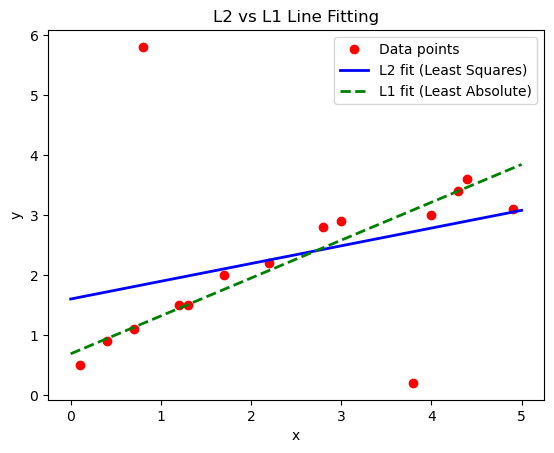

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the L2 norm (least squares) error function
def line_L2_fit(x0, x, y):
    return np.sum((x0[0] * x + x0[1] - y) ** 2)

# Define the L1 norm (least absolute deviation) error function
def line_L1_fit(x0, x, y):
    return np.sum(np.abs(x0[0] * x + x0[1] - y))

# Data points (Step 1)
#x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9])
#y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.9, 3.0, 3.4, 3.6, 3.1])

# Data points (Step 2)
x = np.array([0.1, 0.4, 0.7, 0.8, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 3.8, 4.0, 4.3, 4.4, 4.9])
y = np.array([0.5, 0.9, 1.1, 5.8, 1.5, 1.5, 2.0, 2.2, 2.8, 2.9, 0.2, 3.0, 3.4, 3.6, 3.1])

# Initial guess for the slope and intercept
initial_guess = [1, 1]

# L2 fit (least squares)
result_L2 = minimize(line_L2_fit, initial_guess, args=(x, y))
coeff_L2 = result_L2.x

# L1 fit (least absolute deviation)
result_L1 = minimize(line_L1_fit, initial_guess, args=(x, y))
coeff_L1 = result_L1.x

# Generate values for plotting the lines
xs = np.linspace(0, 5, 100)
y2 = coeff_L2[0] * xs + coeff_L2[1]  # L2 line
y1 = coeff_L1[0] * xs + coeff_L1[1]  # L1 line

# Plot the original data points
plt.plot(x, y, 'ro', label='Data points', linewidth=2)

# Plot the fitted lines
plt.plot(xs, y2, 'b-', label='L2 fit (Least Squares)', linewidth=2)
plt.plot(xs, y1, 'g--', label='L1 fit (Least Absolute)', linewidth=2)

# Add labels, legend, and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('L2 vs L1 Line Fitting')
plt.legend()

# Show the plot
plt.show()


# Coefficient distribution

The following code shows the coefficient distribution of the curve fit.

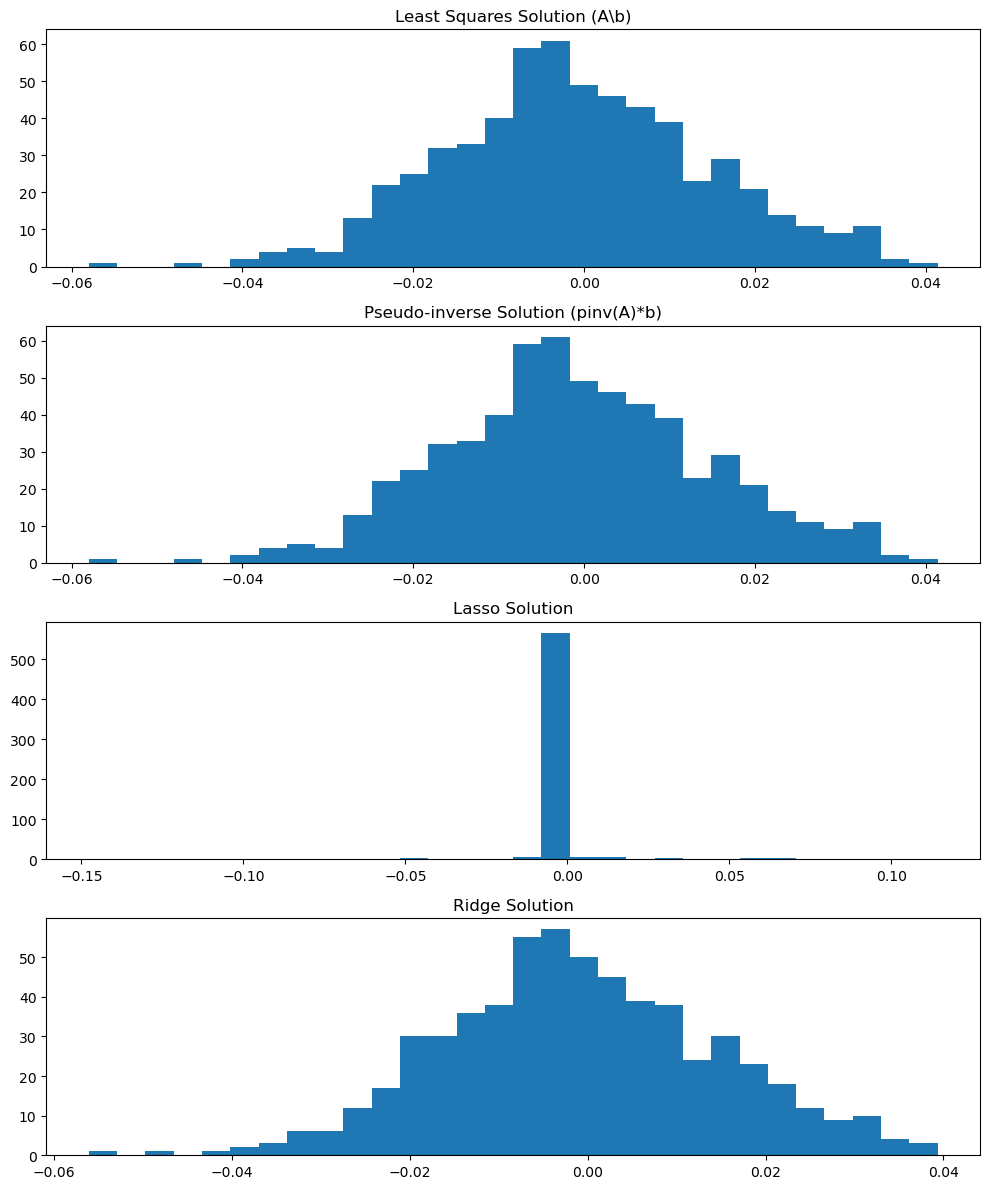

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
import statsmodels.api as sm

# Generate random data
m, n = 100, 600
A = np.random.randn(m, n)
b = np.random.randn(m)

# Solve using least squares (normal equation)
x1 = np.linalg.lstsq(A, b, rcond=None)[0]

# Solve using pseudo-inverse
x2 = np.linalg.pinv(A) @ b

# Solve using Lasso regression
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(A, b)
x3 = lasso_model.coef_

# Solve using Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(A, b)
x4 = ridge_model.coef_

# Solve using robust regression (Huber norm for stability)
#robust_model = sm.RLM(b, A, M=sm.robust.norms.HuberT())
#results = robust_model.fit(scale_est=sm.robust.scale.HuberScale())
#x5 = results.params

# Plot histograms
plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.hist(x1, bins=30)
plt.title('Least Squares Solution (A\\b)')

plt.subplot(4, 1, 2)
plt.hist(x2, bins=30)
plt.title('Pseudo-inverse Solution (pinv(A)*b)')

plt.subplot(4, 1, 3)
plt.hist(x3, bins=30)
plt.title('Lasso Solution')

plt.subplot(4, 1, 4)
plt.hist(x4, bins=30)
plt.title('Ridge Solution')

#plt.subplot(5, 1, 5)
#plt.hist(x5, bins=30)
#plt.title('Robust Fit Solution (Huber)')

plt.tight_layout()
plt.show()



-----
### Congratulations, we're done!

Initially created by Dr. Liz Munch, modified by Dr. Lianzhang Bao, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.